In [16]:
# Task 1: Import libraries
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation as animation


In [17]:
# Tasks 2-7: Implement the PSO algorithm
def particle_swarm_optimizer(n, cost, boundaries, N = 1000, W_lims = [0.9, 0.4], c1=2, c2 = 2):
    '''
    n: number of agents
    cost: The cost function
    boundaries: Bounds on solution space parameters
    N: Number of iterations, default set to 1000
    W_lims: The upper and lower limit of the acceleration weight
    c1, c2: Constants
    '''
    D=np.shape(boundaries)[0]
    
   
    W = np.linspace(W_lims[0], W_lims[1], N)
    ### ENTER CODE HERE ###
    gb_arr=np.empty((N,D))
    p_arr=np.empty((N,n,D))
    cost_arr=[]
    
#     P = np.random.uniform(boundaries[:, 0], boundaries[:, 1], size=(n, D))
#     Pb = P.copy()
#     P_costs=np.array([cost[p] for p in Pb])
    P=np.empty((n,D))
    Pb=np.empty((n,D))
    
    #Instantiating Pb and P
    for j in range(n):
        for k in range(D):
            delta=boundaries[k][1]-boundaries[k][0]
            P[j][k]=np.random.rand()*delta + boundaries[k][0]
    Pb=P.copy()
    
    v=np.empty((n,D))
    for j in range(n):
        for k in range(D):
            v[j][k]=np.random.rand()*2*delta - delta

    for i in range(N):
        costs=[cost(P[l]) for l in range(n)]
        ind_min=np.argmin(costs)
        Gb=P[ind_min]
        
        for j in range(n):
        
            r1=np.random.rand()
            r2=np.random.rand()
        
            v[j]=np.multiply(W[i],v[j])+np.multiply(c1,r1)*(Pb[j]-P[j]) + np.multiply(c2,r2)*(Gb-P[j])
        
            P[j]=v[j]+P[j]
            
            for k in range(D):
                P[j][k]=np.clip(P[j][k],boundaries[k][0],boundaries[k][1])
                
                if cost(P[j])<cost(Pb[j]):
                    Pb[j]=[j]
        
        gb_arr[i]=Gb
        cost_arr.append(costs[ind_min])
        p_arr[i]=P
    
        
    
    ### ENTER CODE HERE ###
    return gb_arr, p_arr, cost_arr

In [18]:
# Task 8: Define the cost function
def cost(params):
    return np.square(params[0]-3.14)+np.square(params[1]-2.72)+np.sin(3*params[0]+0.41)+np.sin(4*params[1]-1.73)


In [19]:
# Task 9: Optimize the cost function
gb_arr, p_arr, cost_arr = particle_swarm_optimizer(10, cost, np.array([[0, 5], [0, 5]]), 250) 
print('The optimal solution: ', gb_arr[-1])
print('Cost of the optimal solution:', cost_arr[-1])

The optimal solution:  [4.77514329 4.77368577]
Cost of the optimal solution: -1.2592553287786417


<IPython.core.display.Javascript object>


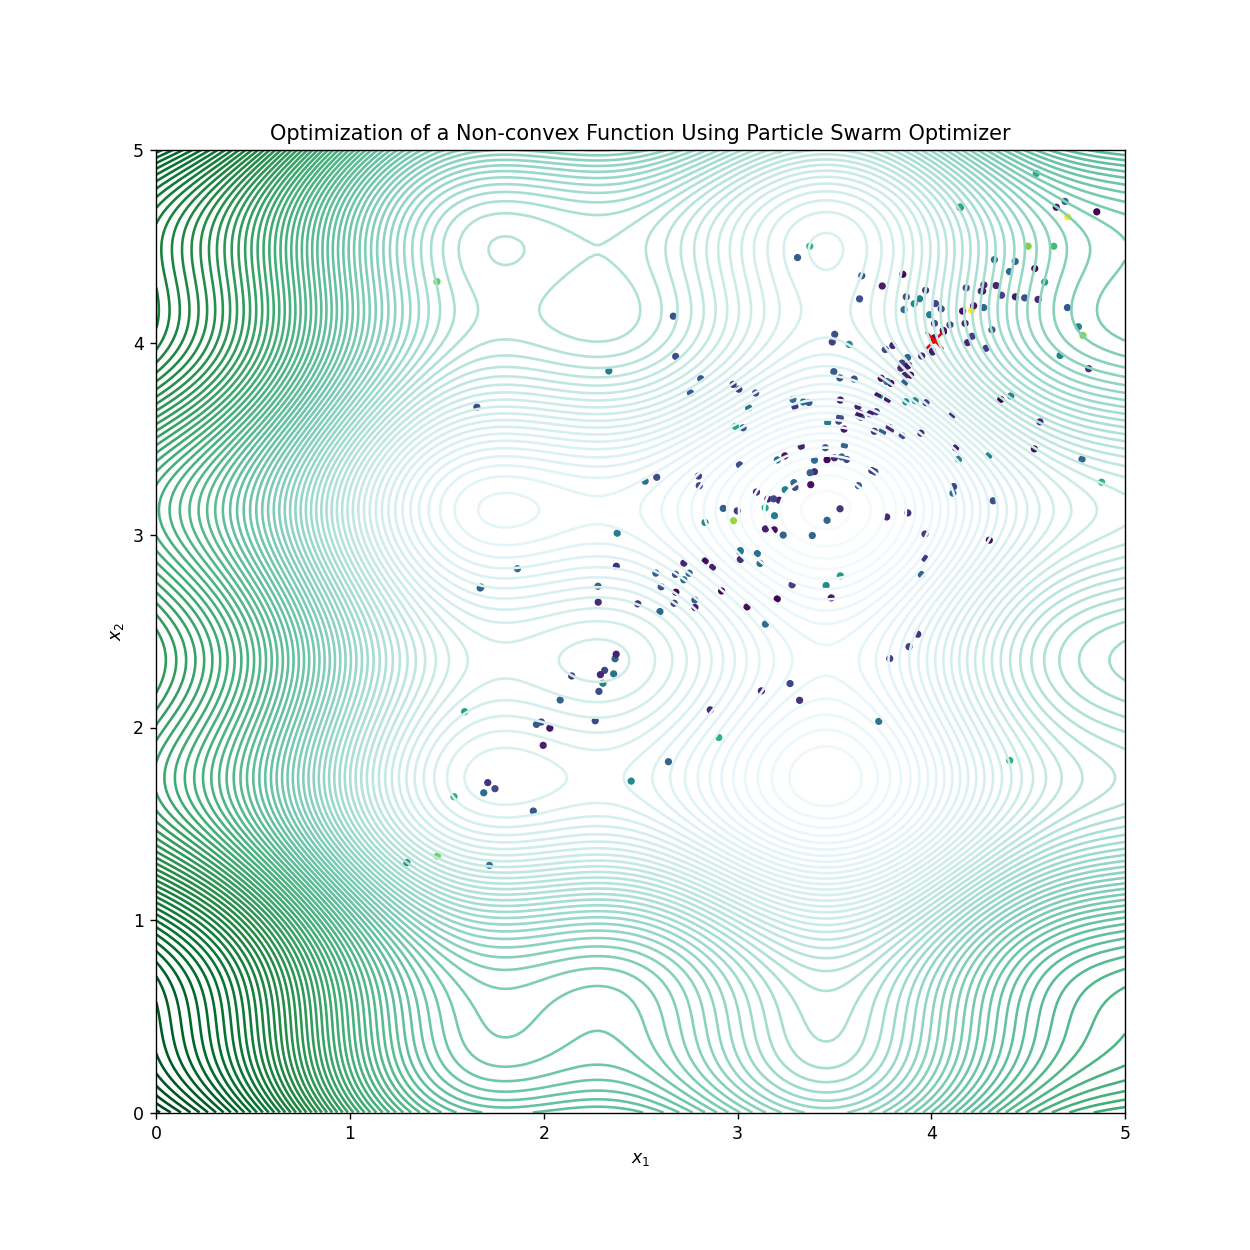

In [22]:
# Task 10: Visualize the results
# Data array
n = 200
x1 = np.linspace(0, 5, n)
x2 = np.linspace(0, 5, n)
# Grid of elements
X, Y = np.meshgrid(x1, x2)
# Cost function on grid
z = []
for y in Y:
    for x in X[0]:
        z.append(cost([x, y[0]]))
Z = np.reshape(z, (n, n))

# #Plotting the cost function of grid
fig = plt.figure(figsize = (10, 10))
plt.contour(X, Y, Z, cmap = 'BuGn', levels = 100)

# Plotting the optimization result
opt_arr = np.mean(p_arr, axis = 1)
param1, param2 = np.split(opt_arr, 2, axis = 1)
plt.scatter(param1, param2, c = cost_arr, s = 10, marker = 'o')

# Plotting the global minimum
plt.scatter(param1[-1], param2[-1], c = 'red', s = 100, marker = 'x')

# # Set labels
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title(r'Optimization of a Non-convex Function Using Particle Swarm Optimizer')  

plt.show()    

<IPython.core.display.Javascript object>


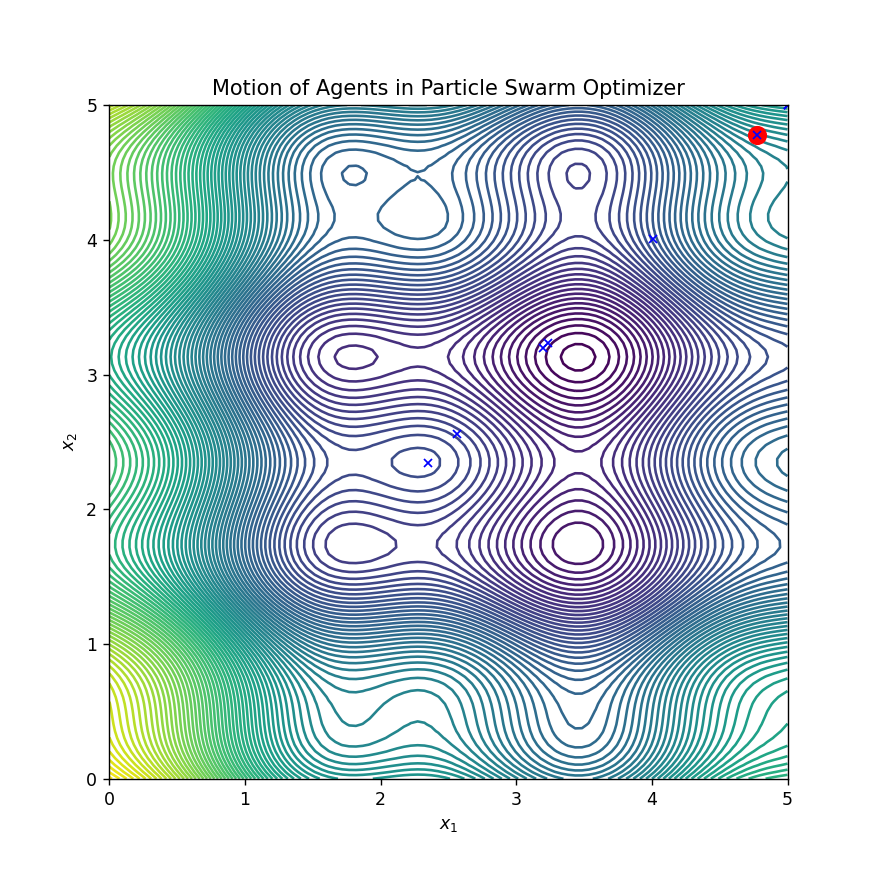

In [21]:
# Task 11: Visualize the Swarm Motion
%matplotlib notebook

bounds = [[0, 5], [0, 5]]
levels = 100
[X, Y] = np.meshgrid(np.linspace(bounds[0][0], bounds[0][1], levels), np.linspace(bounds[1][0], bounds[1][1], levels))
Z = cost([X, Y])

fig = plt.figure(figsize = (7, 7))
plt.contour(X, Y, Z, levels)
gb, = plt.plot(gb_arr[0][0], gb_arr[0][0], 'ro', linestyle = '', markersize = 10)

p1, p2 = np.array_split(p_arr[0], 2, axis=1)
p,  = plt.plot(p1, p2, 'bx', linestyle = '', markersize = 5)

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title(r'Motion of Agents in Particle Swarm Optimizer')  

def update(i, p, gb):
    gb.set_data(gb_arr[i][0], gb_arr[i][1])

    p1, p2 = np.array_split(p_arr[i], 2, axis=1)
    p.set_data(p1, p2)

    return p, gb,

anim = animation.FuncAnimation(fig, update, 2000, fargs = (p, gb), interval = 500,  blit=True, repeat=False)
plt.show()